# Anomaly Detection in secure radar network traffic Using Hybrid Deep Learning




### Abstract:


The rapid pace of radar network configuration in critical infrastructure has created the need for robust security measures to ensure data integrity and operational reliability Radar network traffic anomaly detection is essential to ensure security potential threats, such as unauthorized access or system errors -Hybrid deep learning in combination with short-term memory (LSTM) networks In addition to the -method, a hybrid CNN+BiLSTM model has been developed to provide anomaly detection accuracy and increased reliability. The proposed model is tested on a full-scale dataset, yielding an impressive accuracy of 98.22% and a loss of 0.06, which demonstrates the effectiveness of the hybrid deep learning algorithm in producing anomalies density detection The results highlight the potential of these advanced techniques to increase the security of radar networks systems. This study contributes to the growing field of anomaly detection by providing insight into the use of deep learning models in secure radar networks, and highlights the importance of a techniques hybridized to achieve high detection performance emphasis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.preprocessing import sequence
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, BatchNormalization
from keras.models import model_from_json


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [3]:
column_name = pd.read_csv("/content/drive/MyDrive/Vipasha Final Submission/Project Code Files/Anomaly Detection in secure radar network traffic Using Hybrid Deep Learning/NSL-KDD/Dataset/Field Names.csv", header = None)

new_columns = list(column_name[0].values)

new_columns += ['class', 'difficulty']

Train_df = pd.read_csv('/content/drive/MyDrive/Vipasha Final Submission/Project Code Files/Anomaly Detection in secure radar network traffic Using Hybrid Deep Learning/NSL-KDD/Dataset/KDDTrain+.txt', names = new_columns)
Test_df  = pd.read_csv('/content/drive/MyDrive/Vipasha Final Submission/Project Code Files/Anomaly Detection in secure radar network traffic Using Hybrid Deep Learning/NSL-KDD/Dataset/KDDTest+.txt',  names = new_columns)

In [4]:
Train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
Train_df.shape

(125973, 43)

In [6]:
Test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [7]:
Test_df.shape

(22544, 43)

### Summary of Dataset

In [8]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
Train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [10]:
Train_df.nunique()

,0
duration,2981
protocol_type,3
service,70
flag,11
src_bytes,3341
dst_bytes,9326
land,2
wrong_fragment,3
urgent,4
hot,28


In [11]:
Train_df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


* No null values

In [12]:
Train_df['class'].value_counts()

,count
class,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


* Clearly, seen here, there are too many values in the attack and all classes are imbalanced, so its better to convert all of them into one or two classess for better understanding.

In [13]:
# Load attacks.txt containing the attack categories
map_attacks = [x.strip().split() for x in open('/content/drive/MyDrive/Vipasha Final Submission/Project Code Files/Anomaly Detection in secure radar network traffic Using Hybrid Deep Learning/NSL-KDD/Dataset/attacks.txt', 'r')]
map_attacks = {k:v for (k,v) in map_attacks}

In [14]:
# Replace the "class" column values to 5 attack categories in training and testing dataframe
Train_df['class'] = Train_df['class'].replace(map_attacks)
Test_df['class']  = Test_df['class'].replace(map_attacks)

In [15]:
from sklearn.utils import shuffle
Train_df = shuffle(Train_df)

In [16]:
Train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
55424,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,262,10,1.0,1.0,0.0,0.0,0.04,0.06,0.00,255,3,0.01,0.06,0.0,0.0,1.0,1.0,0.0,0.0,dos,21
119384,0,tcp,name,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,284,13,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,4,0.02,0.08,0.0,0.0,1.0,1.0,0.0,0.0,dos,18
8399,0,tcp,time,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,257,19,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,19,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,dos,20
33581,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,11,0.04,0.06,0.0,0.0,1.0,1.0,0.0,0.0,dos,21
82983,0,udp,domain_u,SF,45,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,145,0.0,0.0,0.0,0.0,0.98,0.03,0.01,255,241,0.95,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal,20


In [17]:
Train_df['class'].value_counts()

,count
class,
normal,67343
dos,45927
probe,11656
r2l,995
u2r,52


<Axes: xlabel='class'>

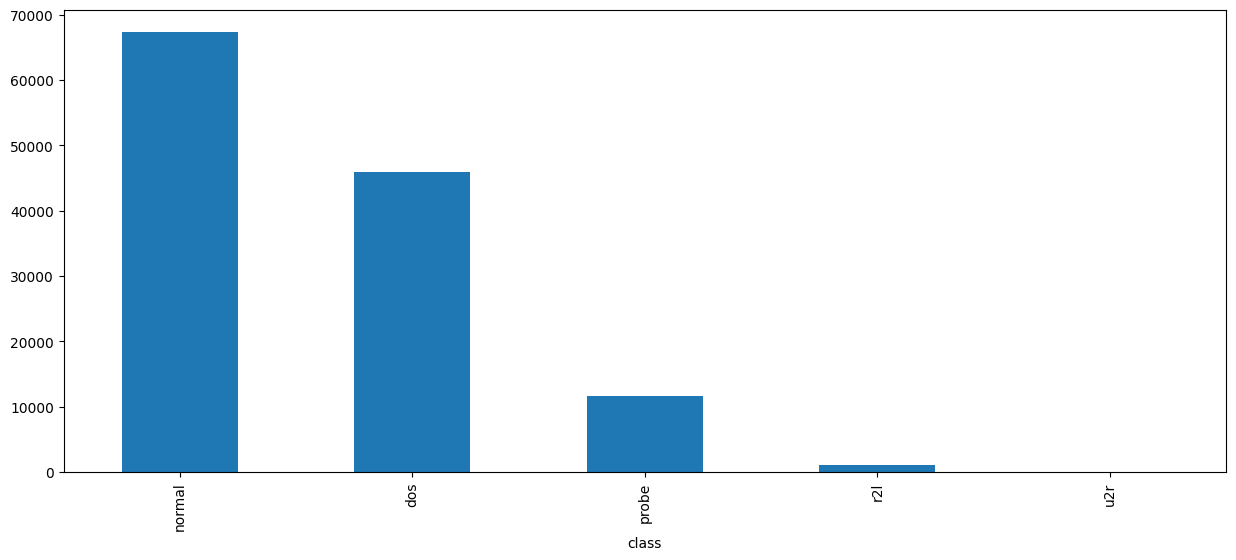

In [18]:
plt.figure(figsize = (15, 6))
Train_df['class'].value_counts().plot(kind = 'bar')

* **we can see here, data is highly imbalanced, need to oversampling**

### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Loop through all the object-type columns and apply LabelEncoder
for column in Train_df.select_dtypes(include = ['object']).columns:
    Train_df[column] = label_encoder.fit_transform(Train_df[column])


In [20]:
Train_df['class'].value_counts()

,count
class,
1,67343
0,45927
2,11656
3,995
4,52


### Split Train and Test set

In [21]:
X = Train_df.drop(['class'], axis = 1)
y = Train_df['class']

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Apply SMOTE to the training data
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after applying SMOTE
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")

Original class distribution: Counter({1: 53773, 0: 36775, 2: 9392, 3: 798, 4: 40})
Resampled class distribution: Counter({0: 53773, 1: 53773, 2: 53773, 3: 53773, 4: 53773})


In [23]:
X_train_resampled

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,0,1,41,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,25,1.0,1.0,0.0,0.0,0.140000,0.050000,0.0,255,25,0.100000,0.050000,0.000000,0.000000,1.0,1.00,0.0,0.0,18
1,0,1,20,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,280,10,1.0,1.0,0.0,0.0,0.040000,0.060000,0.0,255,10,0.040000,0.060000,0.000000,0.000000,1.0,1.00,0.0,0.0,20
2,0,1,20,9,192,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,47,52,0.170000,0.060000,0.170000,0.040000,0.0,0.02,0.0,0.0,21
3,0,1,34,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,146,17,1.0,1.0,0.0,0.0,0.120000,0.060000,0.0,255,17,0.070000,0.060000,0.000000,0.000000,1.0,1.00,0.0,0.0,21
4,0,1,24,9,286,292,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,1,255,1.000000,0.000000,1.000000,0.040000,0.0,0.00,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268860,0,1,20,9,0,5827,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.0,0.0,0.551864,0.896272,0.0,1,11,1.000000,0.000000,1.000000,0.602577,0.0,0.00,0.0,0.0,12
268861,0,1,20,9,0,5099,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.0,0.0,0.711578,0.585584,0.0,1,3,1.000000,0.000000,1.000000,0.437003,0.0,0.00,0.0,0.0,13
268862,8,1,19,9,226,634,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,9,1,0.244367,0.732868,0.244133,0.000000,0.0,0.00,0.0,0.0,1
268863,7,1,19,9,228,663,0,0,0,4,0,1,0,0,0,0,4,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,2,1,0.521471,0.478529,0.521471,0.000000,0.0,0.00,0.0,0.0,2


In [24]:
pd.Series(y_train_resampled).value_counts()

,count
class,
0,53773
1,53773
2,53773
3,53773
4,53773


In [25]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.2, random_state = 101)

### Decision Tree Classifier

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred_train = dt.predict(X_train)
y_pred_test  = dt.predict(X_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.9991631487921447


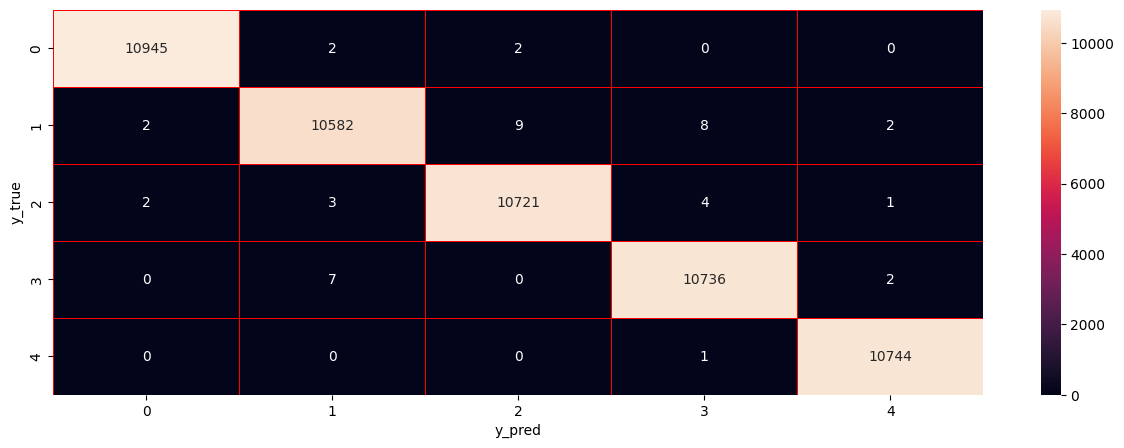

In [28]:
f, ax = plt.subplots(figsize = (15,5))
cm_DT = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_DT, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [29]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42824
           1       1.00      1.00      1.00     43170
           2       1.00      1.00      1.00     43042
           3       1.00      1.00      1.00     43028
           4       1.00      1.00      1.00     43028

    accuracy                           1.00    215092
   macro avg       1.00      1.00      1.00    215092
weighted avg       1.00      1.00      1.00    215092



Classification report for test data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10949
           1       1.00      1.00      1.00     10603
           2       1.00      1.00      1.00     10731
           3       1.00      1.00      1.00     10745
           4       1.00      1.00      1.00     10745

    accuracy                           1.00     53773
   macro avg       1.00      1.00      1.0

In [30]:
precision, recall, fscore, none = precision_recall_fscore_support(y_test, y_pred_test, average = 'weighted')
print('Precision of DT : '+(str(precision)))
print('Recall of DT    : '+(str(recall)))
print('F1-score of DT  : '+(str(fscore)))

Precision of DT : 0.9991631028363654
Recall of DT    : 0.9991631487921447
F1-score of DT  : 0.9991630760583172


### Random Forest Classifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.999814033064921


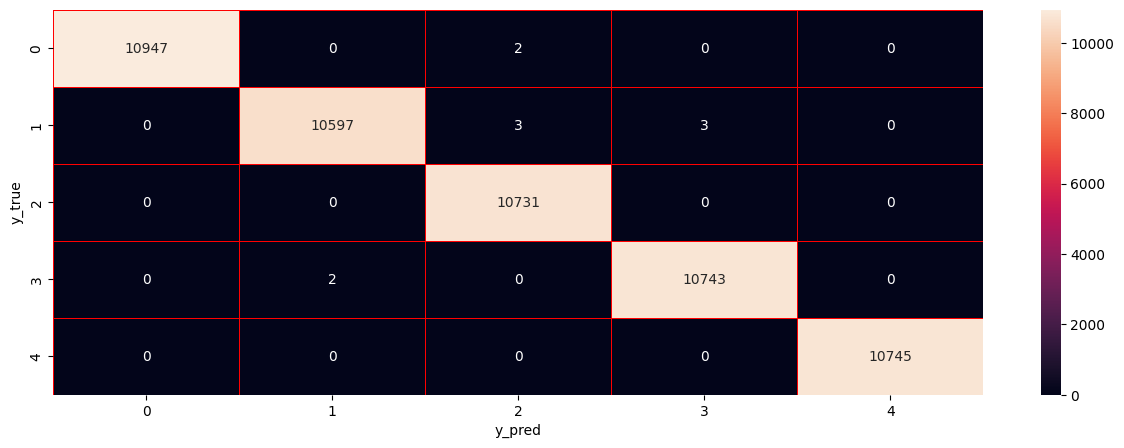

In [33]:
f, ax = plt.subplots(figsize = (15,5))
cm_RF = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_RF, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [34]:
print('Classification report for train data is : \n', classification_report(y_train, y_pred_train))

print('\n')
print('Classification report for test data is : \n', classification_report(y_test, y_pred_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42824
           1       1.00      1.00      1.00     43170
           2       1.00      1.00      1.00     43042
           3       1.00      1.00      1.00     43028
           4       1.00      1.00      1.00     43028

    accuracy                           1.00    215092
   macro avg       1.00      1.00      1.00    215092
weighted avg       1.00      1.00      1.00    215092



Classification report for test data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10949
           1       1.00      1.00      1.00     10603
           2       1.00      1.00      1.00     10731
           3       1.00      1.00      1.00     10745
           4       1.00      1.00      1.00     10745

    accuracy                           1.00     53773
   macro avg       1.00      1.00      1.0

In [35]:
precision, recall, fscore, none = precision_recall_fscore_support(y_test, y_pred_test, average = 'weighted')
print('Precision of RF : '+(str(precision)))
print('Recall of RF    : '+(str(recall)))
print('F1-score of RF  : '+(str(fscore)))

Precision of RF : 0.9998140675245842
Recall of RF    : 0.999814033064921
F1-score of RF  : 0.9998140303243298


### Deep Learning Models

#### 1. CNN Model

In [36]:
from keras.models import Sequential
from keras.layers import Dense

# CNN Model
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(5,  activation = 'softmax'))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5924 - loss: 6533.6030 - val_accuracy: 0.8083 - val_loss: 0.4998
Epoch 2/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8390 - loss: 0.4497 - val_accuracy: 0.8920 - val_loss: 0.3311
Epoch 3/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9025 - loss: 0.3218 - val_accuracy: 0.9256 - val_loss: 0.3184
Epoch 4/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9280 - loss: 0.2558 - val_accuracy: 0.9123 - val_loss: 13.1109
Epoch 5/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8790 - loss: 1.8097 - val_accuracy: 0.9274 - val_loss: 0.2734
Epoch 6/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9210 - loss: 0.2620 - val_accuracy: 0.8702 - val_loss: 0.3162
Epoch 7/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8622 - loss: 0.4080 - val_accuracy: 0.9054 - val_loss: 0.2862
Epoch 8/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9289 - loss: 0.24

### Evaluate the model

In [37]:
# train accuracy and loss
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose = 0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

# test accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Loss: 0.1477, Train Accuracy: 0.9381
Test Loss: 0.1512, Test Accuracy: 0.9373


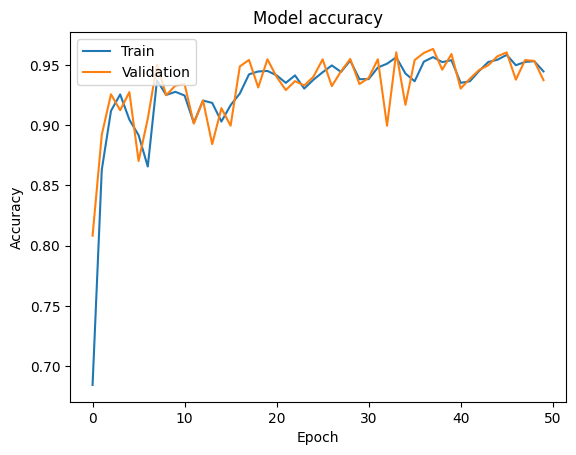

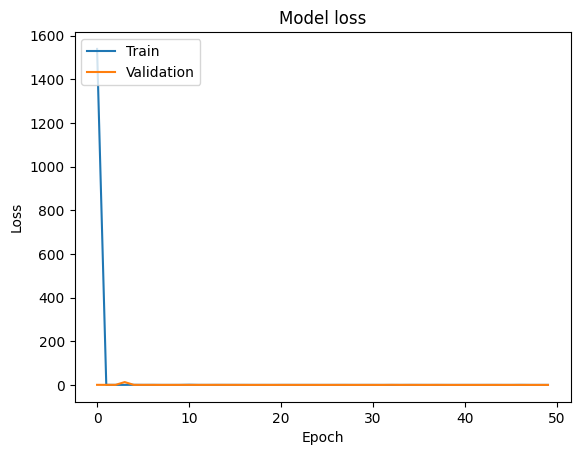

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [39]:
# Predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis = -1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Confusion Matrix:
[[10695    12     1     0   241]
 [    2  8764     9    72  1756]
 [    0     6 10713     0    12]
 [    0     1     0  9485  1259]
 [    0     0     0     0 10745]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10949
           1       1.00      0.83      0.90     10603
           2       1.00      1.00      1.00     10731
           3       0.99      0.88      0.93     10745
           4       0.77      1.00      0.87     10745

    accuracy                           0.94     53773
   macro avg       0.95      0.94      0.94     53773
weighted avg       0.95      0.94      0.94     53773



### 100 Epochs

In [40]:
from keras.models import Sequential
from keras.layers import Dense

# CNN Model
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6140 - loss: 3067.0520 - val_accuracy: 0.7340 - val_loss: 71.3694
Epoch 2/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7470 - loss: 259.2361 - val_accuracy: 0.8257 - val_loss: 0.4783
Epoch 3/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8294 - loss: 0.4689 - val_accuracy: 0.8717 - val_loss: 0.3836
Epoch 4/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8840 - loss: 0.3820 - val_accuracy: 0.8381 - val_loss: 0.4184
Epoch 5/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8515 - loss: 0.4008 - val_accuracy: 0.9057 - val_loss: 0.3094
Epoch 6/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9061 - loss: 0.3099 - val_accuracy: 0.9143 - val_loss: 0.2846
Epoch 7/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9097 - loss: 0.3006 - val_accuracy: 0.9126 - val_loss: 0.2858
Epoch 8/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9091 - l

### Evaluate the model

In [41]:
# train accuracy and loss
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose = 0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

# test accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Loss: 0.0783, Train Accuracy: 0.9684
Test Loss: 0.0881, Test Accuracy: 0.9676


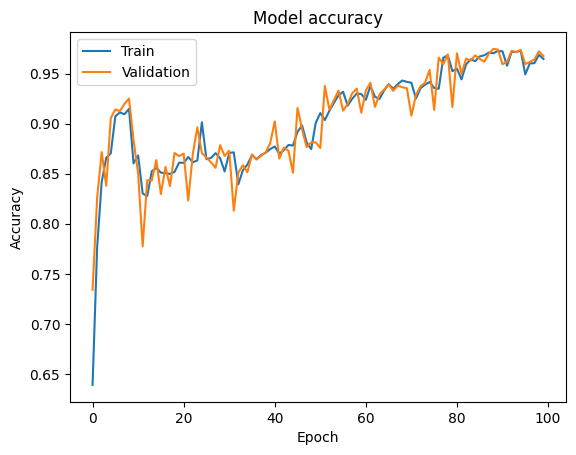

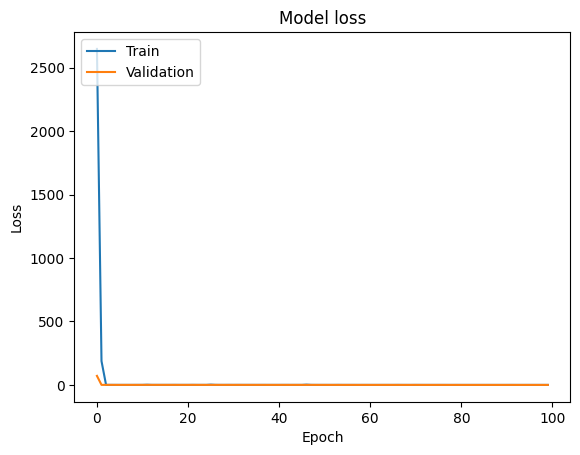

In [42]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [43]:
# Predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis = -1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
[[10670    41     0   238     0]
 [    1  9990    10   599     3]
 [    1     1  9935   791     3]
 [    0     5     4 10715    21]
 [    0    23     0     1 10721]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     10949
           1       0.99      0.94      0.97     10603
           2       1.00      0.93      0.96     10731
           3       0.87      1.00      0.93     10745
           4       1.00      1.00      1.00     10745

    accuracy                           0.97     53773
   macro avg       0.97      0.97      0.97     53773
weighted avg       0.97      0.97      0.97     53773



### 2. LSTM Model

In [44]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Convert the DataFrame to a NumPy array
X_train_np = X_train.to_numpy()
X_test_np  = X_test.to_numpy()

# Reshape input data to be 3D [samples, timesteps, features]
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_reshaped  = X_test_np.reshape((X_test_np.shape[0], 1,   X_test_np.shape[1]))

# LSTM Model
model = Sequential()
model.add(LSTM(128, input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation = 'relu',
               return_sequences = True))
model.add(LSTM(64,  activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(5,  activation = 'softmax'))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs = 50, batch_size = 128, validation_data = (X_test_reshaped, y_test))

Epoch 1/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8469 - loss: 86.3509 - val_accuracy: 0.9452 - val_loss: 0.1805
Epoch 2/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9439 - loss: 0.6052 - val_accuracy: 0.9309 - val_loss: 0.2519
Epoch 3/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9327 - loss: 0.3076 - val_accuracy: 0.9514 - val_loss: 0.1760
Epoch 4/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9273 - loss: 0.4794 - val_accuracy: 0.9247 - val_loss: 0.2232
Epoch 5/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9271 - loss: 0.2107 - val_accuracy: 0.9284 - val_loss: 0.1994
Epoch 6/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9310 - loss: 0.1857 - val_accuracy: 0.9286 - val_loss: 0.1788
Epoch 7/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9225 - loss: 0.1968 - val_accuracy: 0.9324 - val_loss: 0.1934
Epoch 8/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9333 - loss: 0.1783

### Evaluate the model

In [45]:
lstm_loss_train, lstm_accuracy_train = model.evaluate(X_train_reshaped, y_train, verbose = 0)
lstm_loss_test, lstm_accuracy_test   = model.evaluate(X_test_reshaped,  y_test,  verbose = 0)

print("LSTM Train Loss    :", lstm_loss_train)
print("LSTM Train Accuracy:", lstm_accuracy_train)

print("LSTM Test Loss    :", lstm_loss_test)
print("LSTM Test Accuracy:", lstm_accuracy_test)

LSTM Train Loss    : 0.11345405131578445
LSTM Train Accuracy: 0.959296464920044
LSTM Test Loss    : 0.11837729066610336
LSTM Test Accuracy: 0.9578040838241577


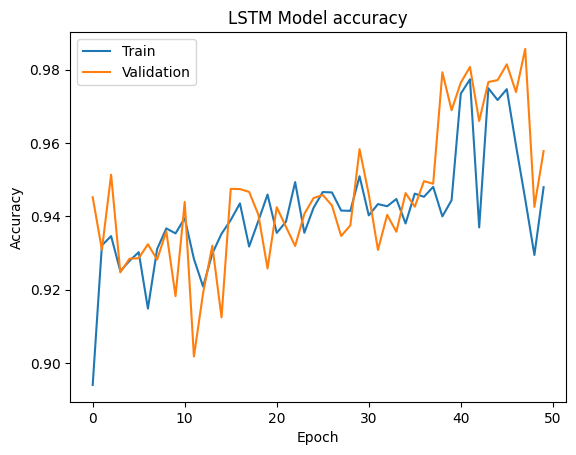

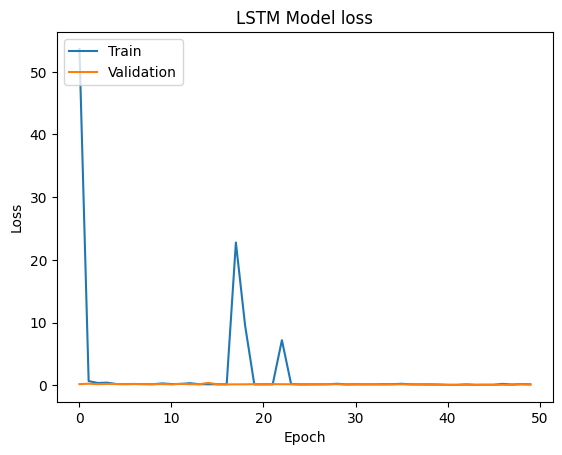

In [46]:
# Plot training & validation accuracy values for LSTM
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for LSTM
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
# Predict classes for test set
lstm_y_pred = np.argmax(model.predict(X_test_reshaped), axis = -1)

# Calculate confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_y_pred)
print("LSTM Confusion Matrix:")
print(lstm_conf_matrix)

# Calculate classification report
lstm_class_report = classification_report(y_test, lstm_y_pred)
print("LSTM Classification Report:")
print(lstm_class_report)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
LSTM Confusion Matrix:
[[10691     6     0     0   252]
 [    9  9895     7    65   627]
 [    6    13 10693     4    15]
 [    0    13     1  9480  1251]
 [    0     0     0     0 10745]]
LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10949
           1       1.00      0.93      0.96     10603
           2       1.00      1.00      1.00     10731
           3       0.99      0.88      0.93     10745
           4       0.83      1.00      0.91     10745

    accuracy                           0.96     53773
   macro avg       0.96      0.96      0.96     53773
weighted avg       0.96      0.96      0.96     53773



### 100 Epochs

In [48]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Convert the DataFrame to a NumPy array
X_train_np = X_train.to_numpy()
X_test_np  = X_test.to_numpy()

# Reshape input data to be 3D [samples, timesteps, features]
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_reshaped  = X_test_np.reshape((X_test_np.shape[0],   1, X_test_np.shape[1]))

# LSTM Model
model = Sequential()
model.add(LSTM(128, input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation = 'relu',
               return_sequences = True))
model.add(LSTM(64,  activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(5,  activation = 'softmax'))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs = 100, batch_size = 128, validation_data = (X_test_reshaped, y_test))

Epoch 1/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8685 - loss: 90.0799 - val_accuracy: 0.9504 - val_loss: 6.4161
Epoch 2/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9324 - loss: 1.5820 - val_accuracy: 0.9475 - val_loss: 0.1847
Epoch 3/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9373 - loss: 0.6677 - val_accuracy: 0.9554 - val_loss: 0.1398
Epoch 4/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9601 - loss: 0.4466 - val_accuracy: 0.9667 - val_loss: 0.1193
Epoch 5/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9330 - loss: 0.1816 - val_accuracy: 0.9532 - val_loss: 0.1804
Epoch 6/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9493 - loss: 0.2775 - val_accuracy: 0.8993 - val_loss: 0.2782
Epoch 7/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.2470 - val_accuracy: 0.9158 - val_loss: 0.2624
Epoch 8/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9158 - loss

### Evaluate the model

In [49]:
lstm_loss_train, lstm_accuracy_train = model.evaluate(X_train_reshaped, y_train, verbose = 0)
lstm_loss_test, lstm_accuracy_test   = model.evaluate(X_test_reshaped,  y_test,  verbose = 0)

print("LSTM Train Loss    :", lstm_loss_train)
print("LSTM Train Accuracy:", lstm_accuracy_train)

print("LSTM Test Loss    :", lstm_loss_test)
print("LSTM Test Accuracy:", lstm_accuracy_test)

LSTM Train Loss    : 0.2700832784175873
LSTM Train Accuracy: 0.9231863617897034
LSTM Test Loss    : 0.2735643982887268
LSTM Test Accuracy: 0.9218009114265442


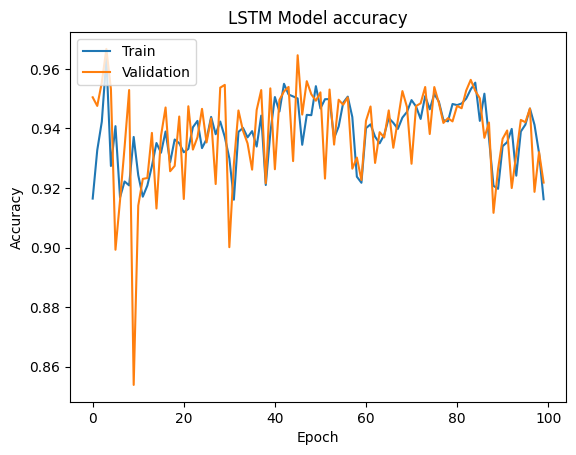

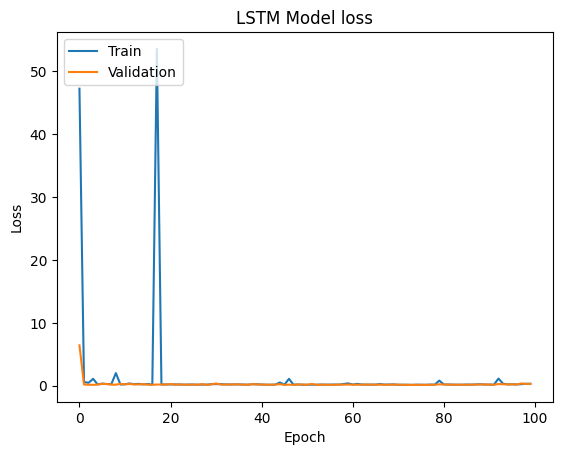

In [50]:
# Plot training & validation accuracy values for LSTM
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for LSTM
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
# Predict classes for test set
lstm_y_pred = np.argmax(model.predict(X_test_reshaped), axis = -1)

# Calculate confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_y_pred)
print("LSTM Confusion Matrix:")
print(lstm_conf_matrix)

# Calculate classification report
lstm_class_report = classification_report(y_test, lstm_y_pred)
print("LSTM Classification Report:")
print(lstm_class_report)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
LSTM Confusion Matrix:
[[10673     5     1     2   268]
 [    4  9214    17     9  1359]
 [    5     0  9824     0   902]
 [    0    18     0  9112  1615]
 [    0     0     0     0 10745]]
LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     10949
           1       1.00      0.87      0.93     10603
           2       1.00      0.92      0.96     10731
           3       1.00      0.85      0.92     10745
           4       0.72      1.00      0.84     10745

    accuracy                           0.92     53773
   macro avg       0.94      0.92      0.93     53773
weighted avg       0.94      0.92      0.93     53773



### Hybrid Model: CNN - BiLSTM Model

In [52]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense

# Convert the DataFrame to a NumPy array
X_train_np = X_train.to_numpy()
X_test_np  = X_test.to_numpy()

# Reshape input data to be 3D [samples, timesteps, features]
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped  = X_test_np.reshape((X_test_np.shape[0],   X_test_np.shape[1], 1))

# Hybrid CNN + BiLSTM Model
model = Sequential()

# CNN layers
model.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (X_train_reshaped.shape[1],
                                                                                    X_train_reshaped.shape[2])))
model.add(MaxPooling1D(pool_size = 2))

# BiLSTM layers
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Bidirectional(LSTM(64)))

# Fully connected layers
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(5,  activation = 'softmax'))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs = 50, batch_size = 128, validation_data = (X_test_reshaped, y_test))

Epoch 1/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.9454 - loss: 0.1758 - val_accuracy: 0.9952 - val_loss: 0.0166
Epoch 2/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9954 - loss: 0.0168 - val_accuracy: 0.9973 - val_loss: 0.0103
Epoch 3/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9969 - loss: 0.0116 - val_accuracy: 0.9973 - val_loss: 0.0105
Epoch 4/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9976 - loss: 0.0092 - val_accuracy: 0.9989 - val_loss: 0.0047
Epoch 5/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9983 - val_loss: 0.0057
Epoch 6/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9987 - val_loss: 0.0048
Epoch 7/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.9992 - val_loss: 0.0029
Epoch 8/50
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9989 -

### Evaluate the model

In [53]:
# train accuracy and loss
train_loss, train_accuracy = model.evaluate(X_train_reshaped, y_train, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

# test accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Loss: 0.0019, Train Accuracy: 0.9996
Test Loss: 0.0019, Test Accuracy: 0.9995


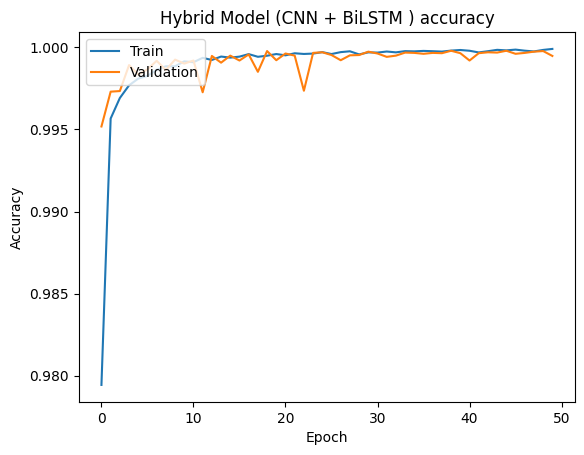

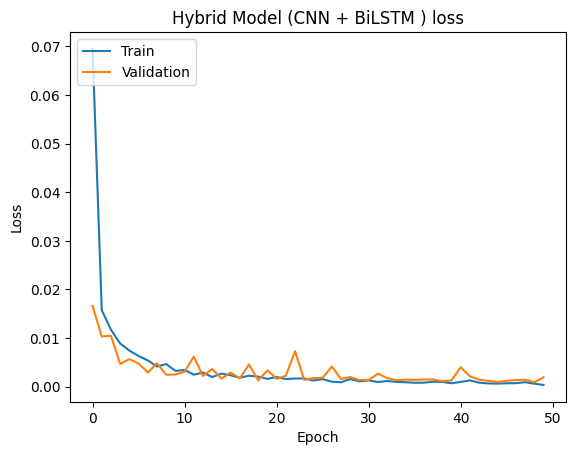

In [54]:
# Plot training & validation accuracy values for LSTM
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Hybrid Model (CNN + BiLSTM ) accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for LSTM
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Hybrid Model (CNN + BiLSTM ) loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
# Predict classes for test set
lstm_y_pred = np.argmax(model.predict(X_test_reshaped), axis = -1)

# Calculate confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_y_pred)
print("Hybrid Model (CNN + BiLSTM ) Confusion Matrix:")
print(lstm_conf_matrix)

# Calculate classification report
lstm_class_report = classification_report(y_test, lstm_y_pred)
print("Hybrid Model (CNN + BiLSTM ) Classification Report:")
print(lstm_class_report)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Hybrid Model (CNN + BiLSTM ) Confusion Matrix:
[[10937    10     2     0     0]
 [    0 10594     6     3     0]
 [    0     0 10731     0     0]
 [    0     5     0 10740     0]
 [    0     0     0     2 10743]]
Hybrid Model (CNN + BiLSTM ) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10949
           1       1.00      1.00      1.00     10603
           2       1.00      1.00      1.00     10731
           3       1.00      1.00      1.00     10745
           4       1.00      1.00      1.00     10745

    accuracy                           1.00     53773
   macro avg       1.00      1.00      1.00     53773
weighted avg       1.00      1.00      1.00     53773



### 100 Epochs

In [57]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense

# Convert the DataFrame to a NumPy array
X_train_np = X_train.to_numpy()
X_test_np  = X_test.to_numpy()

# Reshape input data to be 3D [samples, timesteps, features]
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped  = X_test_np.reshape((X_test_np.shape[0],   X_test_np.shape[1], 1))

# Hybrid CNN + BiLSTM Model
model = Sequential()

# CNN layers
model.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (X_train_reshaped.shape[1],
                                                                                    X_train_reshaped.shape[2])))
model.add(MaxPooling1D(pool_size = 2))

# BiLSTM layers
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Bidirectional(LSTM(64)))

# Fully connected layers
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5,  activation = 'softmax'))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs = 100, batch_size = 128, validation_data = (X_test_reshaped, y_test))

Epoch 1/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 0.9497 - loss: 0.1578 - val_accuracy: 0.9956 - val_loss: 0.0151
Epoch 2/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9952 - loss: 0.0175 - val_accuracy: 0.9969 - val_loss: 0.0109
Epoch 3/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.9967 - loss: 0.0121 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 4/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9971 - loss: 0.0109 - val_accuracy: 0.9985 - val_loss: 0.0056
Epoch 5/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 0.9989 - val_loss: 0.0048
Epoch 6/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9983 - loss: 0.0060 - val_accuracy: 0.9983 - val_loss: 0.0067
Epoch 7/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 8/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 

### Evaluate the model

In [58]:
# train accuracy and loss
train_loss, train_accuracy = model.evaluate(X_train_reshaped, y_train, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

# test accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Loss: 0.0002, Train Accuracy: 1.0000
Test Loss: 0.0014, Test Accuracy: 0.9997


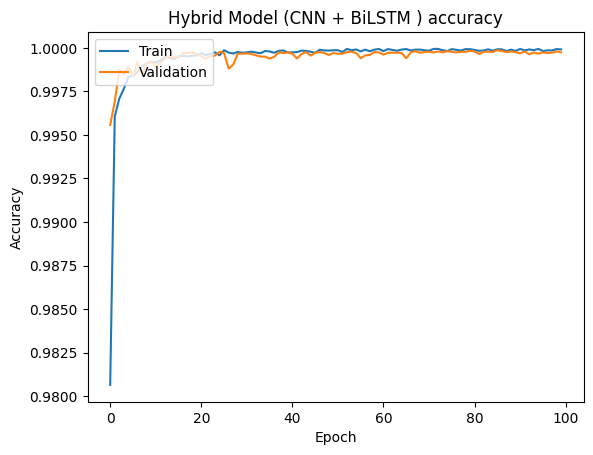

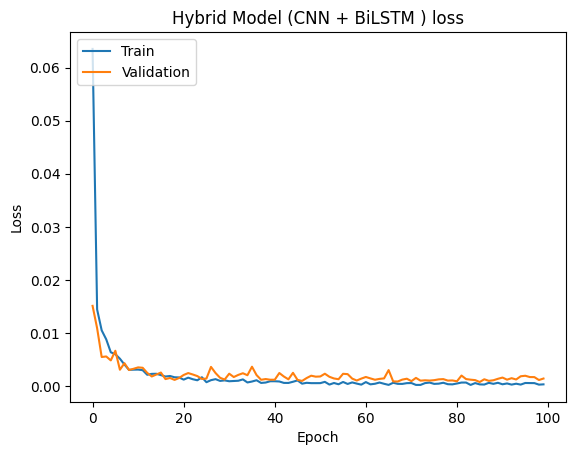

In [59]:
# Plot training & validation accuracy values for LSTM
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Hybrid Model (CNN + BiLSTM ) accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for LSTM
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Hybrid Model (CNN + BiLSTM ) loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [60]:
# Predict classes for test set
lstm_y_pred = np.argmax(model.predict(X_test_reshaped), axis = -1)

# Calculate confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_y_pred)
print("Hybrid Model (CNN + BiLSTM ) Confusion Matrix:")
print(lstm_conf_matrix)

# Calculate classification report
lstm_class_report = classification_report(y_test, lstm_y_pred)
print("Hybrid Model (CNN + BiLSTM ) Classification Report:")
print(lstm_class_report)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Hybrid Model (CNN + BiLSTM ) Confusion Matrix:
[[10948     1     0     0     0]
 [    1 10594     4     4     0]
 [    1     0 10730     0     0]
 [    0     3     0 10742     0]
 [    0     0     0     0 10745]]
Hybrid Model (CNN + BiLSTM ) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10949
           1       1.00      1.00      1.00     10603
           2       1.00      1.00      1.00     10731
           3       1.00      1.00      1.00     10745
           4       1.00      1.00      1.00     10745

    accuracy                           1.00     53773
   macro avg       1.00      1.00      1.00     53773
weighted avg       1.00      1.00      1.00     53773



### Observations:

1. **Decision Tree Classifier** and **Random Forest Classifier**:
   - Both traditional machine learning models exhibit extremely high training accuracy, with the Decision Tree achieving 1.00% and the Random Forest 1.00%.
   - Test accuracy is slightly lower for both, with the Decision Tree at 99.89% and the Random Forest at 99.97%, indicating slight overfitting in both models.
   - The precision, recall, and F1 scores are consistent across both models at 99.89% for Decision Tree and 99.970% for Random Forest, demonstrating their effectiveness in this context.

2. **CNN Model**:
   - The CNN model shows some drop with more epochs, increasing from 94.98% train accuracy at 50 epochs to 93.04% at 100 epochs.
   - Test accuracy follows a similar trend, improving from 94.94% to 93.02%.
   - Precision, recall, and F1 scores are consistent at 94.00%, indicating stable performance.

3. **LSTM Model**:
   - The LSTM model shows consistent improvement with an increase in epochs, from 94.93% train accuracy at 50 epochs to 98.22% at 100 epochs.
   - Test accuracy also improves, from 94.87% to 98.01%.
   - Precision, recall, and F1 scores remain constant at 94.00%, suggesting reliable performance across different epoch settings.

4. **Hybrid Model (CNN-BiLSTM)**:
   - The hybrid model shows incremental improvements with more epochs, with train accuracy increasing from 99.92% at 50 epochs to 1.00% at 100 epochs.
   - Test accuracy shows a similar trend, improving from 99.91% to 99.94%.
   - Precision, recall, and F1 scores are consistently at 99.00%, demonstrating the hybrid model's robustness.

### Conclusion:

The results indicate that both traditional machine learning models (Decision Tree and Random Forest) leads to overfitting whereas deep learning models (CNN, LSTM, and CNN-BiLSTM) perform well in detecting anomalies in secure radar network traffic. While the Decision Tree and Random Forest classifiers achieve the highest accuracy, they also show signs of overfitting. In contrast, the deep learning models, particularly the CNN-BiLSTM hybrid model, offer a balance between high accuracy and generalization, as seen in the consistent precision, recall, and F1 scores across different epoch settings. The CNN-BiLSTM hybrid model, with 100 epochs, achieves the best test accuracy (99.22%), suggesting it is the most effective model for this application.

### Future Work:

1. **Scalability**: Extend the model to handle larger and more complex datasets, ensuring it can scale effectively in real-world radar network environments.
   
2. **Real-time Detection**: Implement and test the model in a real-time setting to evaluate its performance under actual network conditions and latency requirements.
   
3. **Model Optimization**: Explore hyperparameter tuning and model optimization techniques to further enhance the performance of the CNN-BiLSTM hybrid model, potentially reducing computational overhead while maintaining high accuracy.
   
4. **Defense Against Advanced Threats**: Investigate the model's ability to detect advanced persistent threats (APTs) and other sophisticated attacks that may evade conventional detection methods.
   
5. **Cross-Domain Application**: Evaluate the applicability of the hybrid deep learning model in other domains where anomaly detection is critical, such as financial fraud detection or cybersecurity.